In [97]:
from datahandling import access_db
from tinydb import Query
from no_big_db_func import get_Ys
from model_analysis import translate_model_code
from matplotlib.pyplot import figure
import seaborn as sns
from pandas import DataFrame
from numpy import where

%matplotlib inline

Q = Query()

In [81]:
sm_db = access_db(3, True)

In [89]:
sm_db.all()

[{u'data_type': u'MARHE_kW_m2',
  u'equipment_name': u'ConeCal',
  u'model_params': [-2.1601565487,
   7.0515322442,
   19.2376118433,
   12.8072198467,
   -8.4271986552,
   -12.3605578683,
   -37.3134811348,
   27.055931147,
   -189.0764695361],
  u'p_vals': [1.8921500000000002e-05,
   0.0020056819,
   0.0015661778,
   7.27314e-05,
   0.0004278673,
   0.0067604812000000005,
   0.0010901923000000001,
   3.7341e-06,
   0.00048120810000000004],
  u'r_sqrd': 0.9310537826,
  u'select_mcode': [0, 1, 2, 3, 4, 7, 8, 10, 18],
  u'select_score': 0.8858646859,
  u't_vals': [-5.0442124252,
   3.3738280598,
   3.4668051368,
   4.5730792473,
   -3.9430380737,
   -2.9024836567000003,
   -3.6015634952,
   5.6102097967999995,
   -3.9005779493]},
 {u'data_type': u'peak_HRR_kWpm2',
  u'equipment_name': u'ConeCal',
  u'model_params': [-0.8232770624,
   4.6876515340000005,
   -7.282732081,
   4.6309231532,
   -24.5439105173],
  u'p_vals': [0.037889258200000005,
   0.0051068675,
   1.00871e-05,
   4.446940

In [82]:
Ys = get_Ys()

In [83]:
names = Ys.columns

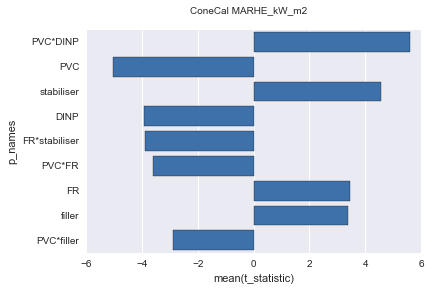

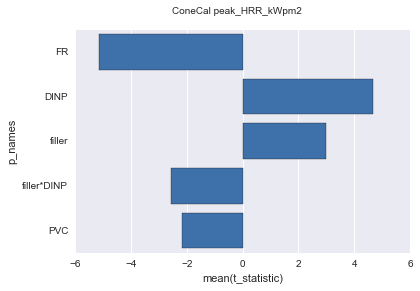

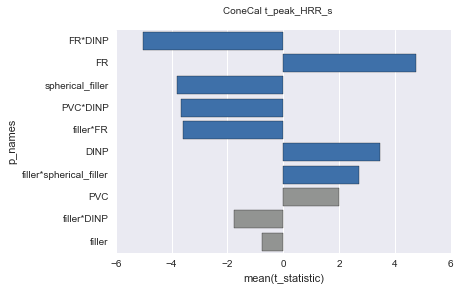

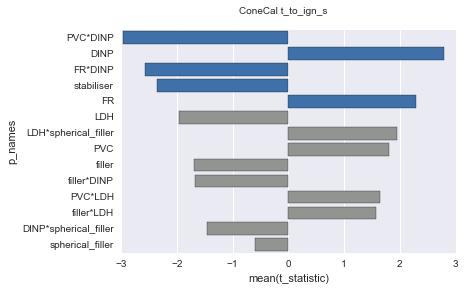

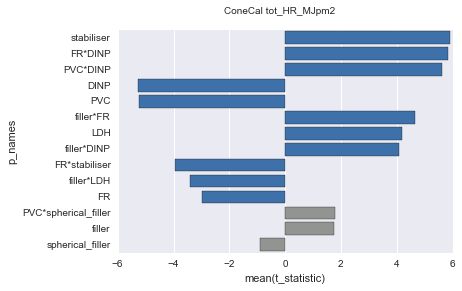

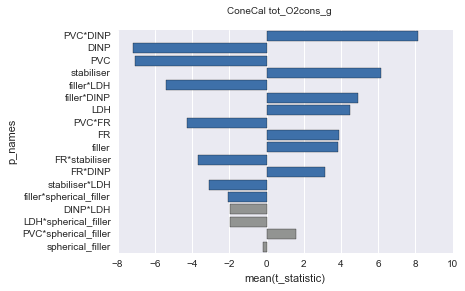

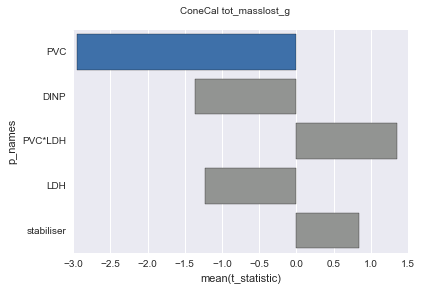

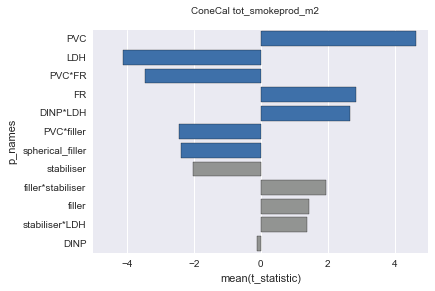

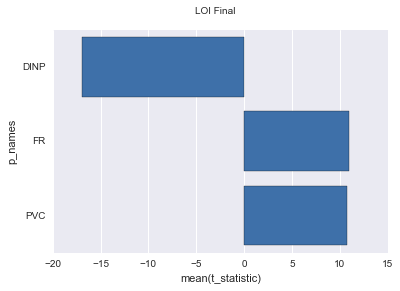

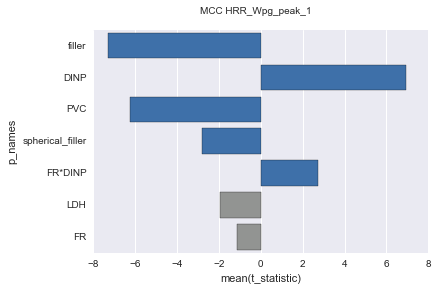

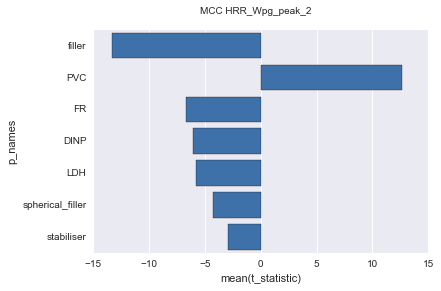

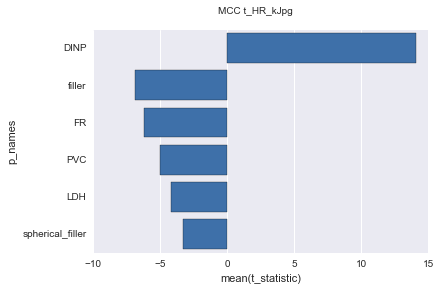

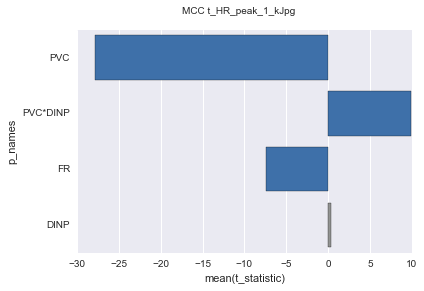

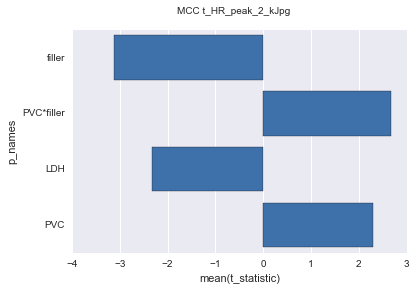

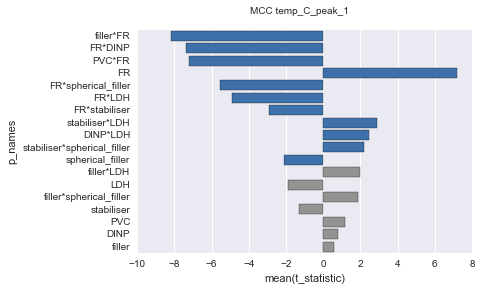

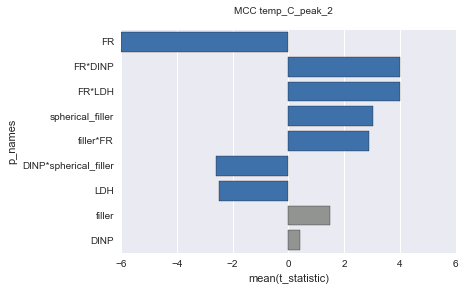

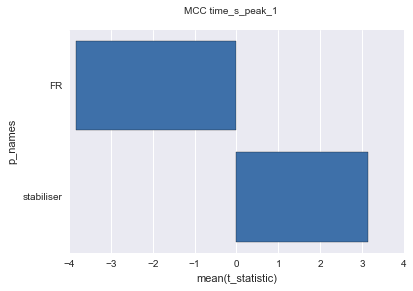

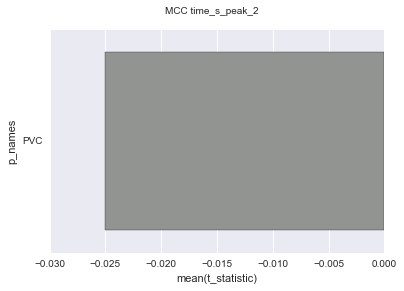

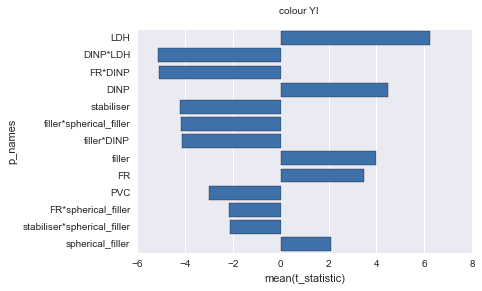

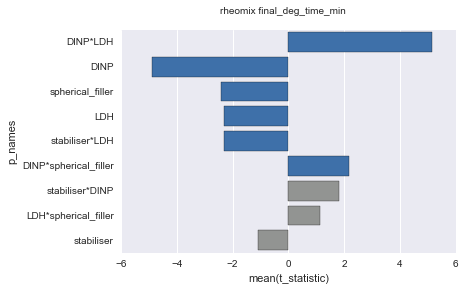

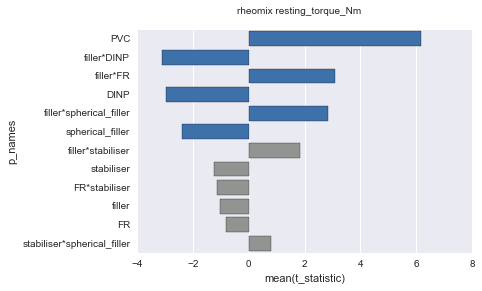

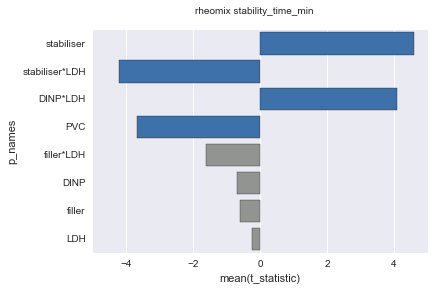

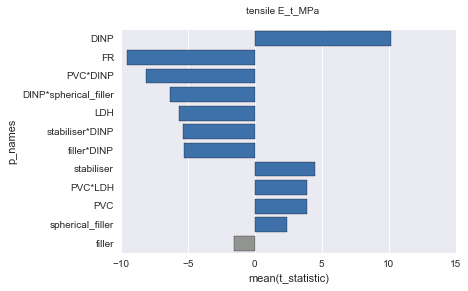

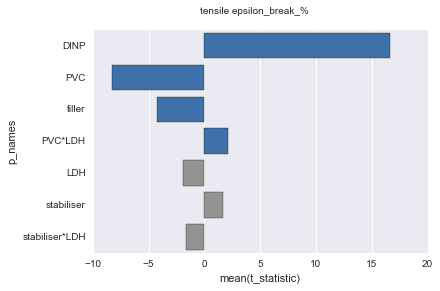

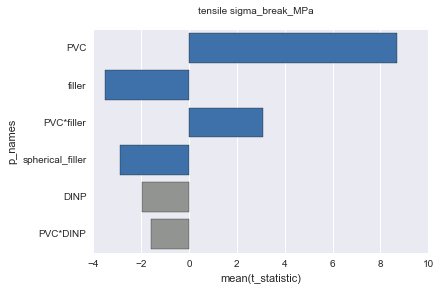

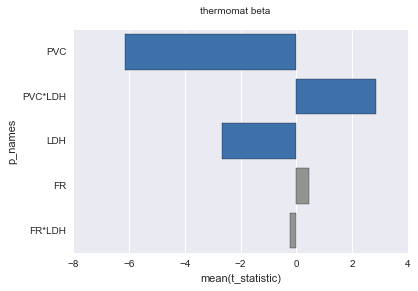

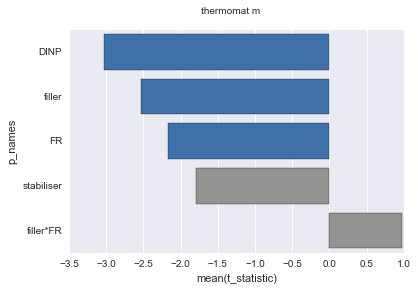

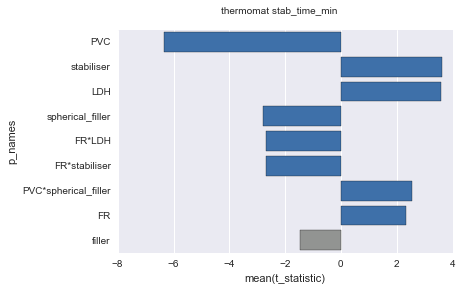

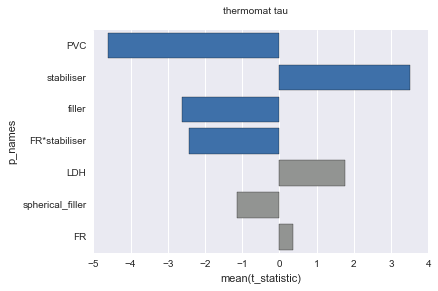

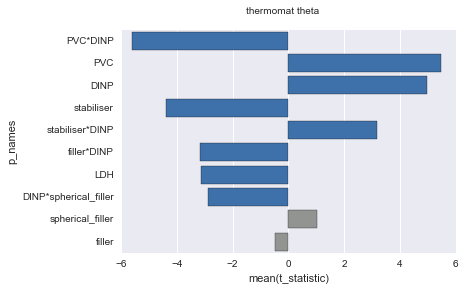

In [146]:
for column in names:
    equip, d_type = column.split(' ')
    
    info = sm_db.search((Q.equipment_name == equip) & (Q.data_type == d_type))
    mcode = info[0]['select_mcode']
    t_vals = info[0]['t_vals']
    p_vals = info[0]['p_vals']
    model_params = info[0]['model_params']
    
    trans_mc = translate_model_code(mcode)
    
    df = DataFrame([trans_mc, t_vals, p_vals, model_params],
                   index=['p_names', 't_statistic', 'p_statistic', 'model_params']).T
    
    sort_df = df.reindex(DataFrame(df['t_statistic'].abs()).sort_values('t_statistic', ascending=False).index)  
    
    colours = [sns.xkcd_rgb['medium blue'] if (x < 0.05) else sns.xkcd_rgb['grey'] for x in sort_df['p_statistic']]
    
    fig1 = figure()
    sns.barplot(x='t_statistic', y='p_names', data=sort_df, palette=colours)
    fig1.suptitle(column)
    
#     fig2 = figure()
#     sns.barplot(x='model_params', y='p_names', data=sort_df, palette=colours)
#     fig2.suptitle(column)

,p_names,t_statistic,p_statistic,model_params
7,PVC*DINP,5.61021,3.7341e-06,27.0559
0,PVC,-5.04421,1.89215e-05,-2.16016
3,stabiliser,4.57308,7.27314e-05,12.8072
4,DINP,-3.94304,0.000427867,-8.4272
8,FR*stabiliser,-3.90058,0.000481208,-189.076
6,PVC*FR,-3.60156,0.00109019,-37.3135
2,FR,3.46681,0.00156618,19.2376
1,filler,3.37383,0.00200568,7.05153
5,PVC*filler,-2.90248,0.00676048,-12.3606
